In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=4, n_informative=4, n_targets=1, noise=50, random_state=7)

In [3]:
df = pd.DataFrame({'feature1':X[:,0], 'feature2':X[:,1], 'feature3':X[:,2], 'feature4':X[:,3], 'target':y})
df.sample(5)

,feature1,feature2,feature3,feature4,target
131,-1.385007,0.803206,-0.074375,0.727779,27.560586
107,0.731154,-1.369860,0.116560,-1.853806,-198.339525
158,0.266761,-1.286517,1.138557,-0.163248,-51.927480
100,0.291984,-1.121999,0.569053,-1.941980,-116.609015
71,0.072508,-0.083112,-0.203527,-2.291420,-178.397115


## Simple Linear Regression from scrach

In [13]:
# multiple linear regression using gradient decent
class MultiLinearRegression:
    def __init__(self, lr=0.05, epochs=100):
        self.__lr = lr
        self.__epochs = epochs

    # training the model
    def fit(self, X, y):
        m = X.shape[1]
        self.__weights = np.zeros(m)
        self.__bias = 0

        # updating parameters using gradient decent
        self.__gradient_decent(X, y)

    # gradient decent
    def __gradient_decent(self, X, y):
        n = X.shape[0]
        self.__loss = []
        self.__r2score = []
        for _ in range(self.__epochs):
            y_pred = np.dot(X, self.__weights) + self.__bias
            
            self.__loss.append(self.__mse(y, y_pred))
            self.__r2score.append(self.__r2(y, y_pred))
    
            # gradients
            dw = (1/n) * np.dot(X.T, (y_pred - y))
            db = (1/n) * np.sum(y_pred - y)
    
            # update
            self.__weights -= self.__lr * dw
            self.__bias -= self.__lr * db

    # predicting target value
    def predict(self, x):
        return np.dot(x, self.__weights) + self.__bias

    # returns weights & bias
    def get_parameters(self):
        return self.__weights, self.__bias

    # plots loss and r2 score
    def plot_cost(self):
        plt.figure(figsize=(10,4))
        plt.subplot(1, 2, 1)
        plt.plot(self.__loss)
        plt.xlabel('Epochs')
        plt.ylabel('Loss (MSE)')
        plt.title('MSE vs Epoch')

        plt.subplot(1, 2, 2)
        plt.plot(self.__r2score)
        plt.xlabel('Epochs')
        plt.ylabel('Efficiency (R2 Score)')
        plt.title('R2-score vs Epoch')
    

    # evaluation metrices
    def evaluate(self, y_true, y_pred):
        print("Mean Absolute Error =\t", self.__mae(y_true, y_pred))
        print("Mean Squared Error =\t", self.__mse(y_true, y_pred))
        print("Root Mean Squared Error =", self.__rmse(y_true, y_pred))
        print("R Squared Error =\t", self.__r2(y_true, y_pred))

    # mean absolute error
    def __mae(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += abs(y_true[i] - y_pred[i])
            return err / len(y_true)

    # mean square error
    def __mse(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += (y_true[i] - y_pred[i]) ** 2
            return err / len(y_true)

    # root mean square error
    def __rmse(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += (y_true[i] - y_pred[i]) ** 2
            return np.sqrt(err / len(y_true))

    # R2 score
    def __r2(self, y_true, y_pred):
        ssr = ((y_true - y_pred)** 2).sum()
        ssm = ((y_true - y_true.mean()) ** 2).sum()
        return 1 - ssr/ssm

In [14]:
xTrain, xTest = X[:150], X[150:]
yTrain, yTest = y[:150], y[150:]

In [15]:
model = MultiLinearRegression(0.1, 100)
model.fit(xTrain, yTrain)

In [16]:
model.predict([1.304835, -0.021524, 0.622629, -0.151398])

np.float64(32.2710958560852)

In [17]:
model.predict(xTest)

array([  78.36143921,   50.44712537,   22.7144855 ,   66.24450855,
       -172.21373569,   71.96786571,    6.26234257,  -13.24160177,
        -62.38998333,    7.89872345,   79.3670485 ,   38.90859365,
         52.59852943,  -70.10568414, -161.86300438,  -30.33598979,
        -10.99028996,   10.28004953,  100.09268357,  -42.23108391,
        -44.6108901 ,  131.65523779,  -93.59900608,    2.31222361,
         64.25677227,   31.45571622,  -58.12079016,  -69.28166451,
         -9.25877927,   21.55198929,   32.45779907, -100.21599084,
        -82.64926708, -137.92162091,   59.87778878,   34.77219242,
         92.09152723,  -68.78168229,  -44.31865781,   55.25431101,
        -44.18500693,   -2.58940841,  -54.8784093 ,  -77.74960436,
         11.14679066,  -77.79194757,  -99.30714273,  -64.13191528,
         81.15926293, -235.05202801])

In [18]:
model.evaluate(yTest, model.predict(xTest))

Mean Absolute Error =	 36.81965906785455
Mean Squared Error =	 2216.357328530331
Root Mean Squared Error = 47.078204389402224
R Squared Error =	 0.7134384378589212


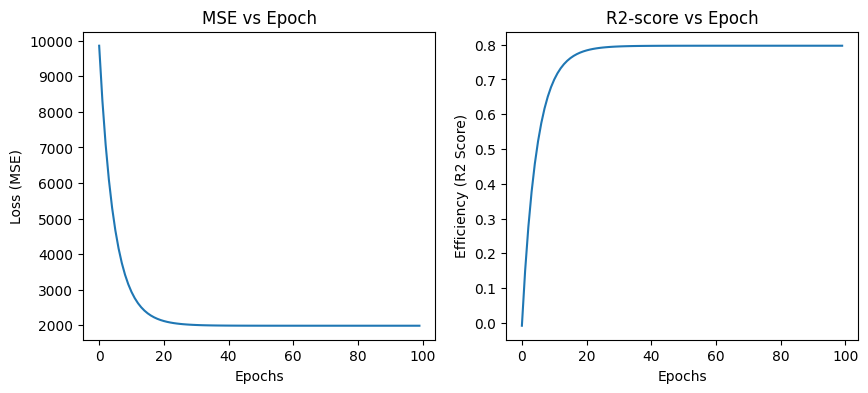

In [19]:
model.plot_cost()

## Comparing with scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(xTrain, yTrain)

LinearRegression()

In [22]:
print(f"Sklearn model:\t\tm = {lr.coef_}\t b = {lr.intercept_}")
print(f"Model from Scrach:\tm = {model.get_parameters()[0]}\t b = {model.get_parameters()[1]}")

Sklearn model:		m = [25.51624866 55.41897652  5.19314697 63.54431624]	 b = 6.566864522379861
Model from Scrach:	m = [25.51360257 55.41874052  5.19677848 63.53452183]	 b = 6.556221762114324


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Sklearn Model:")
print("Mean Absolute Error =\t", mean_absolute_error(yTest, model.predict(xTest)))
print("Mean Squared Error =\t", mean_squared_error(yTest, model.predict(xTest)))
print("Root Mean Squared Error =", mean_squared_error(yTest, model.predict(xTest)))
print("R Squared Error =\t", r2_score(yTest, model.predict(xTest)))

Sklearn Model:
Mean Absolute Error =	 36.819659067854545
Mean Squared Error =	 2216.3573285303305
Root Mean Squared Error = 2216.3573285303305
R Squared Error =	 0.7134384378589212


In [24]:
print("Model from Scrach:")
model.evaluate(yTest, model.predict(xTest))

Model from Scrach:
Mean Absolute Error =	 36.81965906785455
Mean Squared Error =	 2216.357328530331
Root Mean Squared Error = 47.078204389402224
R Squared Error =	 0.7134384378589212
